## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import stem

In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\Springboard repo_github\\Springboard-DS-Track\\Capstone Three_StackOverflow\\notebooks'

In [3]:
df = pd.read_csv("..\data\Stackoverflow_cleansed.csv")

In [4]:
df.shape

(1455901, 8)

In [5]:
df.head(5)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
0,0,7,1,2750,data verifications gettersetter elsewher,pim wondering good idea make strongverificatio...,"optimization, setter, getter, verification",validation captured separately getters setters...
1,1,7,3,2750,data verifications gettersetter elsewher,pim wondering good idea make strongverificatio...,"optimization, setter, getter, verification",perspective maintainable code think much valid...
2,2,7,3,2750,data verifications gettersetter elsewher,pim wondering good idea make strongverificatio...,"optimization, setter, getter, verification",depends generally code fail fast value set mul...
3,3,7,1,2750,data verifications gettersetter elsewher,pim wondering good idea make strongverificatio...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...
4,4,7,1,2750,data verifications gettersetter elsewher,pim wondering good idea make strongverificatio...,"optimization, setter, getter, verification",like implement idataerrorinfo put validation l...


In [6]:
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gosal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#df['Q_Body'] = df[~df['Q_Body'].str.contains(r'(?<!\S)(?!http|\S*www\.)\S{12}')]
#df.shape[0]

**Note**: Stemming on Q_Body and A_Body column was not done in the Data Wrangling step, so resuming this step so all the 'text' columns in the dataframe are cleansed as a part of Text pre-processing

In [8]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if len(token) < 20 ]
    return ' '.join(stemmed_tokens)

df['Q_Body'] = df['Q_Body'].apply(stem_sentences)
df['A_Body'] = df['A_Body'].apply(stem_sentences)
df.shape[0]

1455901

In [9]:
df.dtypes

Unnamed: 0     int64
Q_Score        int64
A_Score        int64
Id             int64
Title         object
Q_Body        object
Tag           object
A_Body        object
dtype: object

In [10]:
df.head(4)

,Unnamed: 0,Q_Score,A_Score,Id,Title,Q_Body,Tag,A_Body
0,0,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...
1,1,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...
2,2,7,3,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...
3,3,7,1,2750,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...


In [11]:
#df['Q_Body'] = df['Q_Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#### Standardize the magnitude of numeric features using a scaler

In [12]:
# Create subset of only the numeric columns
df_numeric = df.select_dtypes(include=['int64','float'])
print(df_numeric.columns)

Index(['Unnamed: 0', 'Q_Score', 'A_Score', 'Id'], dtype='object')


In [12]:
# Create subset of only the categorical variable columns
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical.columns)

Index(['Title', 'Q_Body', 'Tag', 'A_Body'], dtype='object')


In [13]:
df_numeric[['Q_Score','A_Score']].describe()

,Q_Score,A_Score
count,1.455901e+06,1.455901e+06
mean,9.834082e-01,1.038608e+00
std,1.674276e+00,1.273145e+00
min,-4.000000e+00,-3.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00
max,7.000000e+00,5.000000e+00


In [14]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(df_numeric[['Q_Score','A_Score']])

# Transform the data using the fitted scaler
df_numeric[['Q_Score_scaled','A_Score_scaled']] = scaler.transform(df_numeric[['Q_Score','A_Score']])

# Compare the origional and transformed column
print(df_numeric[['Q_Score_scaled','A_Score_scaled']].head(5))

   Q_Score_scaled  A_Score_scaled
0             1.0             0.2
1             1.0             0.6
2             1.0             0.6
3             1.0             0.2
4             1.0             0.2


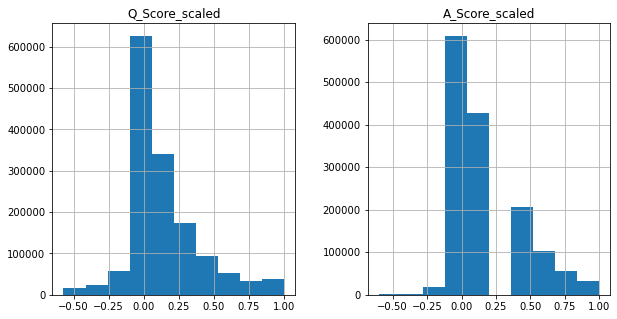

In [15]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

df_numeric.hist(['Q_Score_scaled','A_Score_scaled'])
plt.show()

In [16]:
# Drop non scaled column
df_numeric.drop(columns=['Q_Score','A_Score'], inplace=True)
df_numeric.head(5)

,Unnamed: 0,Id,Q_Score_scaled,A_Score_scaled
0,0,2750,1.0,0.2
1,1,2750,1.0,0.6
2,2,2750,1.0,0.6
3,3,2750,1.0,0.2
4,4,2750,1.0,0.2


In [17]:
df_numeric[['Q_Score_scaled','A_Score_scaled']].describe()

,Q_Score_scaled,A_Score_scaled
count,1.455901e+06,1.455901e+06
mean,1.404869e-01,2.077217e-01
std,2.391823e-01,2.546290e-01
min,-5.714286e-01,-6.000000e-01
25%,0.000000e+00,0.000000e+00
50%,1.428571e-01,2.000000e-01
75%,2.857143e-01,4.000000e-01
max,1.000000e+00,1.000000e+00


In [18]:
df_numeric_scaled = pd.concat([df_categorical, df_numeric], axis=1, sort=False)
df_numeric_scaled.head(5)

,Title,Q_Body,Tag,A_Body,Unnamed: 0,Id,Q_Score_scaled,A_Score_scaled
0,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...,0,2750,1.0,0.2
1,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...,1,2750,1.0,0.6
2,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...,2,2750,1.0,0.6
3,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...,3,2750,1.0,0.2
4,data verifications gettersetter elsewher,pim wonder good idea make stronggettersstrong ...,"optimization, setter, getter, verification",like implement idataerrorinfo put valid logic ...,4,2750,1.0,0.2


In [19]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455901 entries, 0 to 1455900
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Title           1455901 non-null  object 
 1   Q_Body          1455901 non-null  object 
 2   Tag             1455898 non-null  object 
 3   A_Body          1455901 non-null  object 
 4   Unnamed: 0      1455901 non-null  int64  
 5   Id              1455901 non-null  int64  
 6   Q_Score_scaled  1455901 non-null  float64
 7   A_Score_scaled  1455901 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.9+ MB


#### Perform Count vectorization (OR TFIDF) on categorical feature to fit and transform data

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [21]:
#TFIDF representation on quesion body and tag

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv_question = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

# Fit the vectroizer and transform the data. Need to create a dataframe with tfidf vectorized Q_body to identify tags
#associated to question

tv_transformed_question= tv_question.fit_transform(df_numeric_scaled['Q_Body'])

# Create a DataFrame with these features
tv_df_question = pd.DataFrame(tv_transformed_question.toarray(), 
                     columns=tv_question.get_feature_names())

print(tv_df_question.head())

    10  abl  access  activ   ad  add  amp  anoth  anyon  app  ...  version  \
0  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
1  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
2  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
3  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   
4  0.0  0.0     0.0    0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...      0.0   

   view  void  want  way  web  width  window  work  write  
0   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
1   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
2   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
3   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  
4   0.0   0.0   0.0  0.0  0.0    0.0     0.0   0.0    0.0  

[5 rows x 200 columns]


In [22]:
#TFIDF representation on answers and voting scores 

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv_answer = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

# Fit the vectroizer and transform the data. Need to create a dataframe with tfidf 
#vectorized A_Body to identify whether a given answer is upvoted or downvoted

tv_transformed_answer = tv_answer.fit_transform(df_numeric_scaled['A_Body'])

# Create a DataFrame with these features
tv_df_answer = pd.DataFrame(tv_transformed_answer.toarray(), 
                     columns=tv_answer.get_feature_names())

print(tv_df_answer.head())

    10  access  actual   ad  add  allow   alreadi  amp  anoth  answer  ...  \
0  0.0     0.0     0.0  0.0  0.0    0.0  0.221444  0.0    0.0     0.0  ...   
1  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
2  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
3  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   
4  0.0     0.0     0.0  0.0  0.0    0.0  0.000000  0.0    0.0     0.0  ...   

   var  variabl  version  view  void    want       way    window  work  write  
0  0.0      0.0      0.0   0.0   0.0  0.0000  0.315390  0.000000   0.0    0.0  
1  0.0      0.0      0.0   0.0   0.0  0.0000  0.189883  0.000000   0.0    0.0  
2  0.0      0.0      0.0   0.0   0.0  0.0000  0.000000  0.000000   0.0    0.0  
3  0.0      0.0      0.0   0.0   0.0  0.0000  0.000000  0.000000   0.0    0.0  
4  0.0      0.0      0.0   0.0   0.0  0.1412  0.154366  0.224284   0.0    0.0  

[5 rows x 200 columns]


In [39]:
a = np.zeros((200, 1455901), dtype='uint8')
mb= a.nbytes/8000
print('Megabytes needed to be allocated are',mb)

Megabytes needed to be allocated are 36397.525


In [54]:
df_final_question_tfidf = pd.concat([df_numeric_scaled, tv_df_question], axis = 0, ignore_index=True)
df_final_question_tfidf = df_final_question_tfidf.drop(columns=['Title', 'A_Body', 'Unnamed: 0','Id','Q_Score_scaled','A_Score_scaled'])
df_final_question_tfidf.head(5)

MemoryError: Unable to allocate 2.17 GiB for an array with shape (200, 1455901) and data type float64

In [ ]:
df_final_answer_tfidf = pd.concat([df_numeric_scaled, tv_df_answer], axis=1, sort=False)
df_final_answer_tfidf = df_final_answer_tfidf.drop(columns=['Title', 'Q_Body', 'Tag', 'Unnamed: 0','Id','Q_Score_scaled'])
df_final_answer_tfidf.head(5)

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#train_df_question_tfidf, test_df_question_tfidf = train_test_split(df_final_question_tfidf, test_size=0.3)

In [ ]:
#train_df_answer_tfidf, test_df_answer_tfidf = train_test_split(df_final_answer_tfidf, test_size=0.3)

In [ ]:
df_final_question_tfidf.to_csv("../data/Question_Tags_tfidf.csv")

In [ ]:
df_final_answer_tfidf.to_csv("../data/Answers_Votes_tfidf.csv")

**Note**: Training dataset development will be done in the modeling notebook due to memory issues faced when trying to do the train-test dataset split